In [1]:
#import cv2. numpy as np
#의미적으로, import cv2, import numpy as np와 같다.
#처음에는 패키지 로딩이 필요해서 좀 걸리나, 한번 로딩한 후부터는, 과정이 생략되어 속도가 개선된다.

import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from PIL import ImageFont, ImageDraw, Image

In [2]:
#그래프와 이미지 형태로 항상 출력되도록, 함수로 정의
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        #흑백영상이면, shape이 2, 칼라면 3, 칼라면 BGR패턴을 RGB 패턴으로, 흑백은 gray
        
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

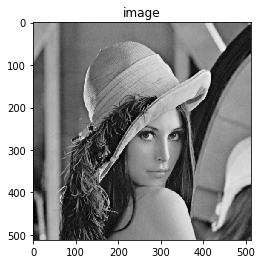

Threshold used: 127.0


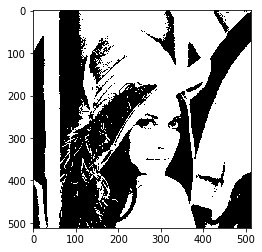

In [3]:
ip = "C:/Users/student/Desktop/OpenCV/"

#0은 흑백으로 읽으라는것
image = cv2.imread(ip + "Lena.png", 0)

imshow("image", image)

#127보다 작은것은 0으로, 큰것은 255로 보겠다.
thr, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
print('Threshold used:', thr)

plt.imshow(image, cmap = 'gray')
plt.imshow(mask, cmap = 'gray')

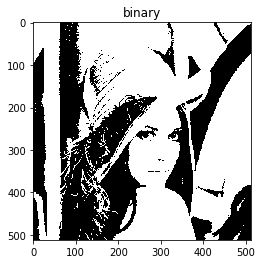

In [4]:
#이 임계값(120)을 결정하는것이 쉽지가 않다. 1970년대에 나온 알고리즘
thr, mask = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
imshow("binary", mask)

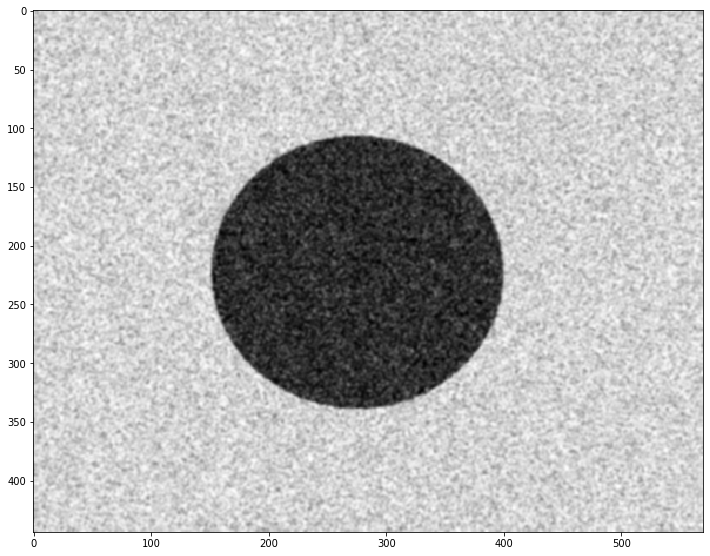

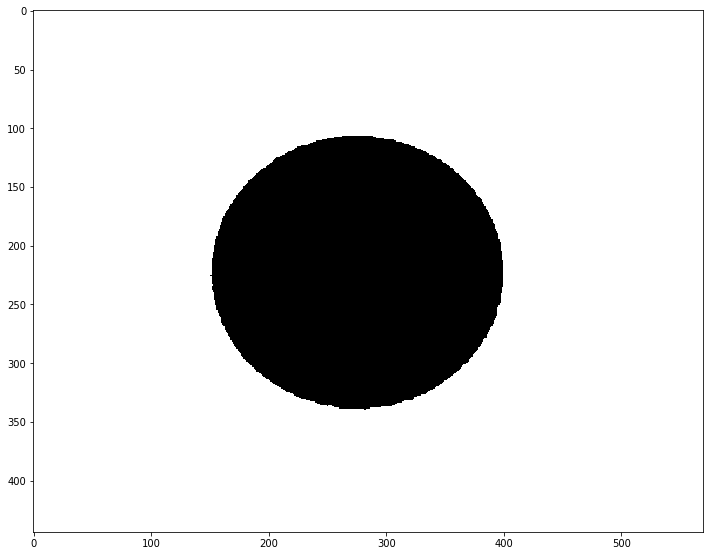

In [5]:
#---- 이것은 1970년대 방법 ----#
#커널 == 마스크#
#예전에 컴퓨터가 느리던 시절은 필터를 작게 했지만, 요새는 크게 해도 된다.#

#어쨌거나, 수작업으로 적절한 값을 찾으면 되지만, 그런것이 안통하는 사진도 있다. 
#사람이 보면, 누가봐도, 전경이고, 배경인지 구분이 쉽다. 기계는 노이즈 때문에 어렵다.

#0은 흑백으로 읽으라는것
image = cv2.imread(ip + "circle.png", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.

#값을 적절히 찾더라도, 수를 낮추면,전경에 있는 부분이 전부 출력이 안되고, 값을 높이면, 노이즈가 사라지지 않는다.
_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY) #_의미 : 의미없는 return 값을 반환하는것이다. 이 함수는 2가지 파라미터를
#반환하는데, 하나는 의미가 없어서 이렇게 쓴다.

plt.figure(figsize = (12, 12))
imshow("", img_blur)

plt.figure(figsize = (12, 12))
imshow("", binary)

#그래서, 블러링 사용, 평균의 효과 : 이미지 자체를 뿌옇게 만든다. 잡음을 없앤다.

(100.0, array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8))
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


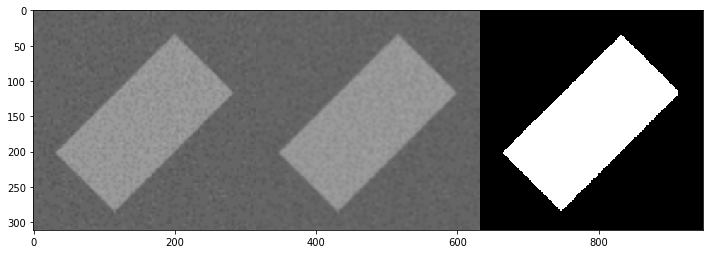

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

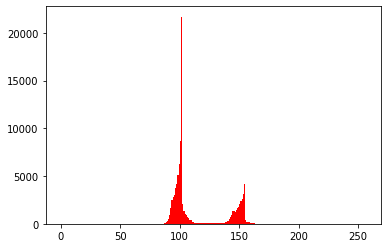

In [6]:
#위의 원은 배경과 전경의 차이가 뚜렷하여, 아무값이나 잡아도, 되지만, 아래 사각형은, 전경과 배경의 차이가 크지 않아, 임계값을 잘 잡아야 한다.
#0은 흑백으로 읽으라는것
image = cv2.imread(ip + "boxnoise.PNG", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.
out = cv2.threshold(img_blur, 100, 255, cv2.THRESH_BINARY)#얘는 튜플이다. 그래서, _를 써주는것
print(out)
print(out[1])

#값을 적절히 찾더라도, 수를 낮추면,전경에 있는 부분이 전부 출력이 안되고, 값을 높이면, 노이즈가 사라지지 않는다.
_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY) #_의미 : 의미없는 return 값을 반환하는것이다. 이 함수는 2가지 파라미터를, 불필요한 변수
#반환하는데, 하나는 의미가 없어서 이렇게 쓴다.


_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binary]))

#1차원으로 변환, 몇개의 비(막대기 수), 전체의 범위
plt.hist(image.ravel(), 256,[0, 256], color = 'r')


<Figure size 864x864 with 0 Axes>

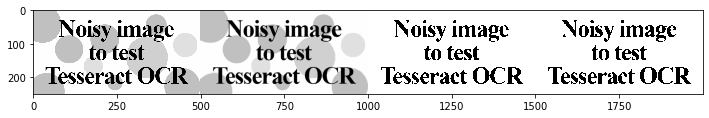

(array([1.4415e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 6.5000e+01, 0.0000e+00, 0.0000e+00, 3.7000e+01,
        0.0000e+00, 0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4200e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.1000e+01, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.8000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2000e+01,
        1.5800e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5000e+01, 0.0000e+00, 0.0000e+00, 0.00

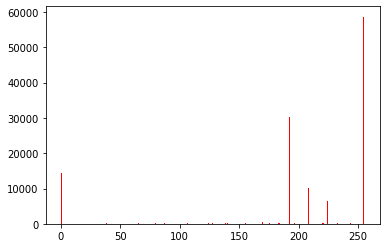

In [7]:
#적절한 임계값을 찾는 합리적인 방법
#for문으로 돌린다?
#왜 아래 그림이 더 어려운가? 상세하게 설명할 수 있어야 한다.
#히스토그램으로, 영상의 밝은곳과 어두운곳의 분포를 파악할 수 있다.

image = cv2.imread(ip + "NI.png", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.

#값을 적절히 찾더라도, 수를 낮추면,전경에 있는 부분이 전부 출력이 안되고, 값을 높이면, 노이즈가 사라지지 않는다.
_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY) #_의미 : 의미없는 return 값을 반환하는것이다. 이 함수는 2가지 파라미터를, 불필요한 변수
#반환하는데, 하나는 의미가 없어서 이렇게 쓴다.


_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (12, 12))

_,binaryO = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #THRESHOLD를 일일이 지정하지 않고, 0값을 주면, 알아서 한다.
#1970년대 알고리즘

plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binary, binaryO]))
#1차원으로 변환, 몇개의 비(막대기 수, 전체의 범위)
plt.hist(image.ravel(), 256,[0, 256], color = 'r')


<Figure size 864x864 with 0 Axes>

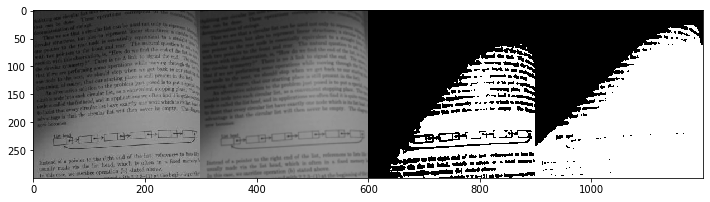

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.600e+01, 1.300e+01,
        3.000e+01, 2.500e+01, 4.500e+01, 5.300e+01, 7.000e+01, 8.500e+01,
        9.200e+01, 1.000e+02, 1.430e+02, 1.690e+02, 1.930e+02, 1.900e+02,
        2.090e+02, 2.320e+02, 2.460e+02, 2.640e+02, 3.030e+02, 3.020e+02,
        3.380e+02, 3.660e+02, 3.240e+02, 4.040e+02, 4.100e+02, 4.480e+02,
        4.700e+02, 5.030e+02, 4.730e+02, 5.100e+02, 5.720e+02, 6.800e+02,
        8.270e+02, 1.107e+03, 1.212e+03, 1.139e+03, 1.169e+03, 1.303e+03,
        1.315e+03, 1.325e+03, 1.165e+03, 1.045e+03, 9.410e+02, 8.240e+02,
        7.680e+02, 7.400e+02, 6.290e+02, 6.990e+02, 5.440e+02, 5.240e+02,
        5.280e+02, 5.290e+02, 5.140e+02, 4.900e+02, 4.890e+02, 4.640e+02,
        4.700e+02, 4.790e+02, 5.290e+02, 5.440e+02, 5.030e+02, 4.570e+02,
        4.440e+02, 4.770e+02, 4.520e+0

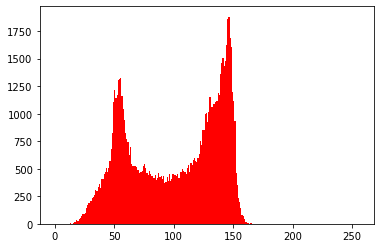

In [8]:
#global threshold(역치값) 쓴다는것이 한계다. 즉, 분류 기준이 하나다.
#해결법, 역치값을 여러개로 둔다.

image = cv2.imread(ip + "text.jpg", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.

#값을 적절히 찾더라도, 수를 낮추면,전경에 있는 부분이 전부 출력이 안되고, 값을 높이면, 노이즈가 사라지지 않는다.
_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY) #_의미 : 의미없는 return 값을 반환하는것이다. 이 함수는 2가지 파라미터를, 불필요한 변수
#반환하는데, 하나는 의미가 없어서 이렇게 쓴다.


_,binary = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (12, 12))
 

_,binaryO = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #THRESHOLD를 일일이 지정하지 않고, 0값을 주면, 알아서 한다.
#1970년대 알고리즘

plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binary, binaryO]))
#1차원으로 변환, 몇개의 비(막대기 수, 전체의 범위)
plt.hist(image.ravel(), 256,[0, 256], color = 'r')



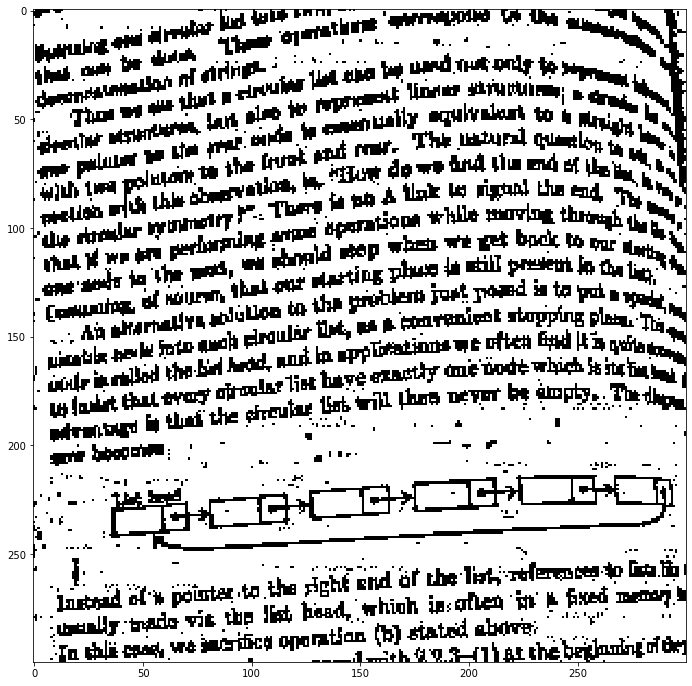

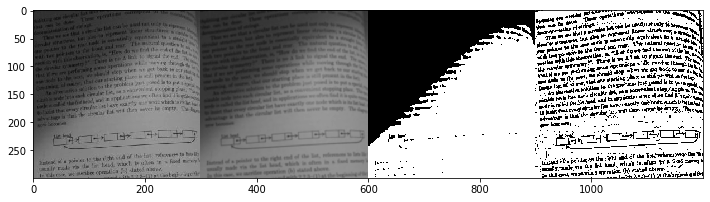

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.600e+01, 1.300e+01,
        3.000e+01, 2.500e+01, 4.500e+01, 5.300e+01, 7.000e+01, 8.500e+01,
        9.200e+01, 1.000e+02, 1.430e+02, 1.690e+02, 1.930e+02, 1.900e+02,
        2.090e+02, 2.320e+02, 2.460e+02, 2.640e+02, 3.030e+02, 3.020e+02,
        3.380e+02, 3.660e+02, 3.240e+02, 4.040e+02, 4.100e+02, 4.480e+02,
        4.700e+02, 5.030e+02, 4.730e+02, 5.100e+02, 5.720e+02, 6.800e+02,
        8.270e+02, 1.107e+03, 1.212e+03, 1.139e+03, 1.169e+03, 1.303e+03,
        1.315e+03, 1.325e+03, 1.165e+03, 1.045e+03, 9.410e+02, 8.240e+02,
        7.680e+02, 7.400e+02, 6.290e+02, 6.990e+02, 5.440e+02, 5.240e+02,
        5.280e+02, 5.290e+02, 5.140e+02, 4.900e+02, 4.890e+02, 4.640e+02,
        4.700e+02, 4.790e+02, 5.290e+02, 5.440e+02, 5.030e+02, 4.570e+02,
        4.440e+02, 4.770e+02, 4.520e+0

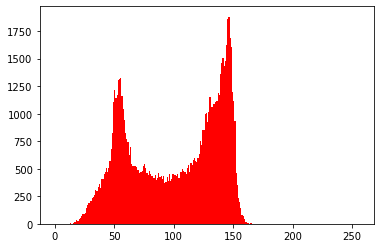

In [9]:
#global threshold(역치값) 쓴다는것이 한계다. 즉, 분류 기준이 하나다.
#해결법, 역치값을 여러개로 둔다.
#쉽게 생각하면, 따로따로 보는것이다.

image = cv2.imread(ip + "text.jpg", 0)

#img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.

#21*21로 나눈다. 만약 전체가 100*100이고, 50*50으로 하면, 4개로 나눈다는것
#2는 THRESHOLD 값을 기준으로 얼마나 뺄지 0이면, 평균값 그대로, 2면, 구간별보다 좀더 어두운게 기준이 된다.
#가우시안 평균은 평균에 가까운것에 가중치를 주는것

binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY, 21, 2)

plt.figure(figsize = (12, 12))
imshow("", binary)

_,binaryO = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #THRESHOLD를 일일이 지정하지 않고, 0값을 주면, 알아서 한다.
#1970년대 알고리즘

plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binaryO, binary]))
#1차원으로 변환, 몇개의 비(막대기 수, 전체의 범위)
plt.hist(image.ravel(), 256,[0, 256], color = 'r')

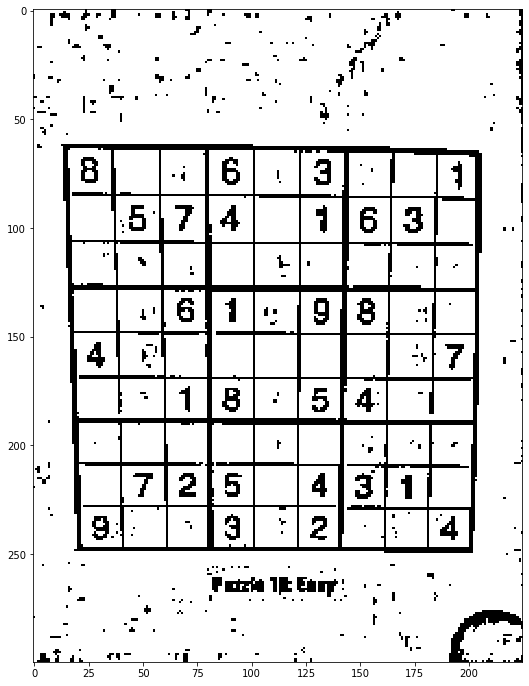

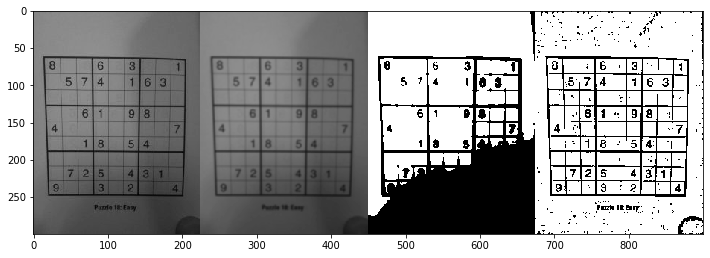

(array([0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 1.900e+01, 2.200e+01, 2.200e+01,
        1.700e+01, 2.800e+01, 3.400e+01, 2.800e+01, 2.500e+01, 2.300e+01,
        6.100e+01, 5.700e+01, 7.500e+01, 5.400e+01, 8.000e+01, 7.000e+01,
        9.600e+01, 1.180e+02, 9.900e+01, 1.230e+02, 9.200e+01, 1.000e+02,
        9.700e+01, 1.500e+02, 1.080e+02, 1.340e+02, 1.810e+02, 1.340e+02,
        1.570e+02, 1.720e+02, 1.580e+02, 2.090e+02, 1.510e+02, 1.680e+02,
        1.760e+02, 1.510e+02, 1.390e+02, 1.300e+02, 1.100e+02, 1.150e+02,
        1.240e+02, 1.470e+02, 1.550e+02, 1.700e+02, 1.750e+02, 1.680e+02,
        2.710e+02, 2.630e+02, 2.800e+02, 2.550e+02, 2.750e+02, 3.410e+02,
        2.880e+02, 3.120e+02, 2.370e+02, 2.830e+02, 3.350e+02, 3.820e+02,
        5.010e+02, 5.320e+02, 5.060e+02, 6.070e+02, 6.760e+02, 6.460e+02,
        6.130e+02, 6.350e+02, 6.110e+02, 6.560e+02, 5.260e+02, 5.290e+02,
        5.140e+02, 5.280e+02, 5.460e+0

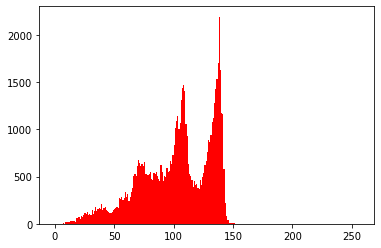

In [10]:
#global threshold(역치값) 쓴다는것이 한계다. 즉, 분류 기준이 하나다.
#해결법, 역치값을 여러개로 둔다.
#쉽게 생각하면, 따로따로 보는것이다.

image = cv2.imread(ip + "grid.jpg", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.

#21*21로 나눈다. 만약 전체가 100*100이고, 50*50으로 하면, 4개로 나눈다는것
#2는 THRESHOLD 값을 기준으로 얼마나 뺄지 0이면, 평균값 그대로, 2면, 구간별보다 좀더 어두운게 기준이 된다.
#가우시안 평균은 평균에 가까운것에 가중치를 주는것

binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY, 21, 2)

plt.figure(figsize = (12, 12))
imshow("", binary)

_,binaryO = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #THRESHOLD를 일일이 지정하지 않고, 0값을 주면, 알아서 한다.
#1970년대 알고리즘

plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binaryO, binary]))
#1차원으로 변환, 몇개의 비(막대기 수, 전체의 범위)
plt.hist(image.ravel(), 256,[0, 256], color = 'r')

In [43]:
#global threshold(역치값) 쓴다는것이 한계다. 즉, 분류 기준이 하나다.
#해결법, 역치값을 여러개로 둔다.
#쉽게 생각하면, 따로따로 보는것이다.

image = cv2.imread(ip + "reciept.jpg", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이 값을 크게할수록 가장자리가 블러링된다.

#21*21로 나눈다. 만약 전체가 100*100이고, 50*50으로 하면, 4개로 나눈다는것
#2는 THRESHOLD 값을 기준으로 얼마나 뺄지 0이면, 평균값 그대로, 2면, 구간별보다 좀더 어두운게 기준이 된다.
#가우시안 평균은 평균에 가까운것에 가중치를 주는것

binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY, 21, 21)

plt.figure(figsize = (12, 12))
imshow("", binary)

_,binaryO = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #THRESHOLD를 일일이 지정하지 않고, 0값을 주면, 알아서 한다.
#1970년대 알고리즘

plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binaryO, binary]))
#1차원으로 변환, 몇개의 비(막대기 수, 전체의 범위)
plt.hist(image.ravel(), 256,[0, 256], color = 'r')
plt.show()

cv2.imwrite(ip + "output.png", binary)

median = cv2.medianBlur(image, 5)

imshow("", np.hstack([image, img_blur, binaryO, binary, median]))


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


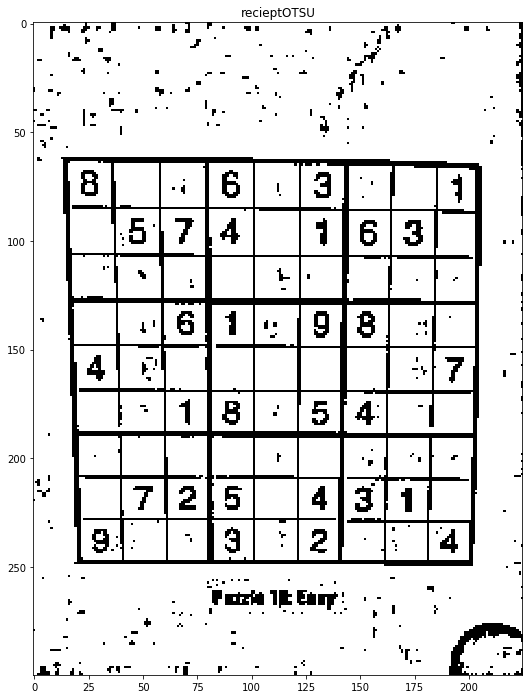

NameError: name 'median' is not defined

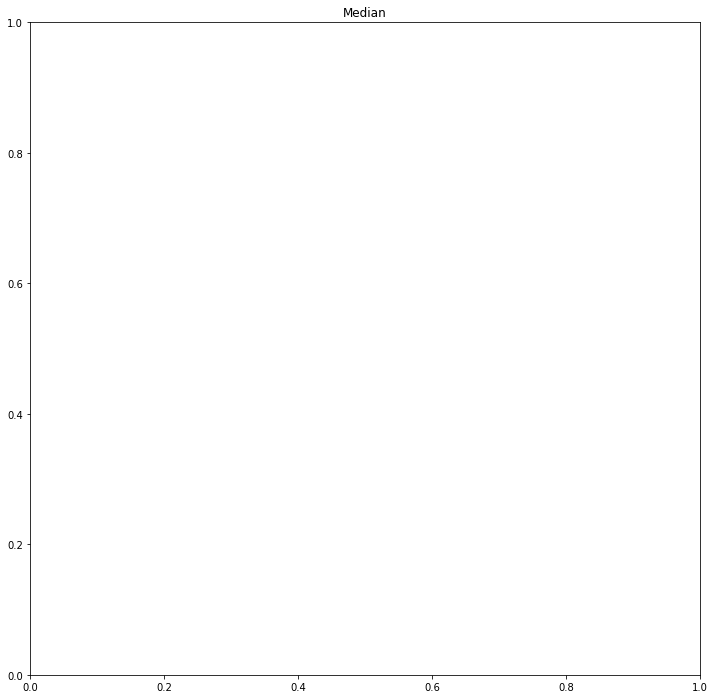

In [12]:
plt.figure(figsize = (12, 12))
plt.imshow(binary, cmap = "gray")
plt.title("recieptOTSU")
plt.show()


#튀는 애들이 적으면, Median Blur가 효과적
#튀는애들이 많으면, 별로다.

plt.figure(figsize = (12, 12))
plt.title("Median")
plt.imshow(median, cmap = "gray")

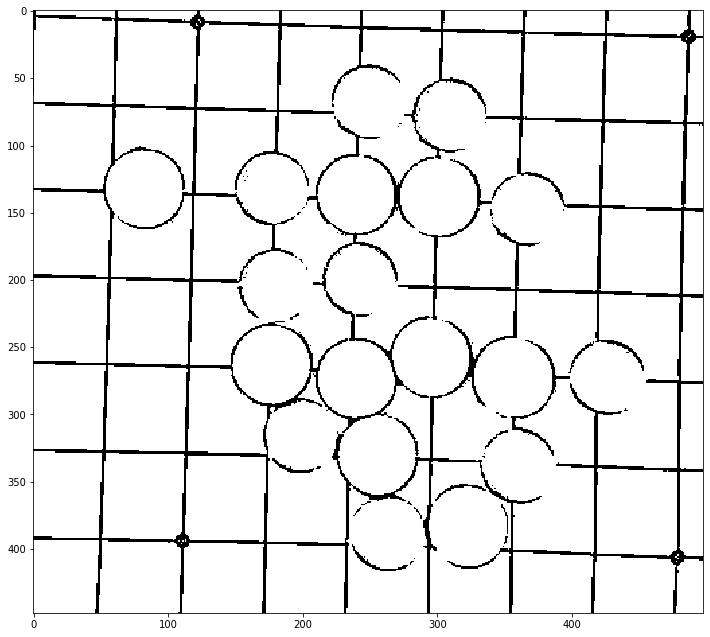

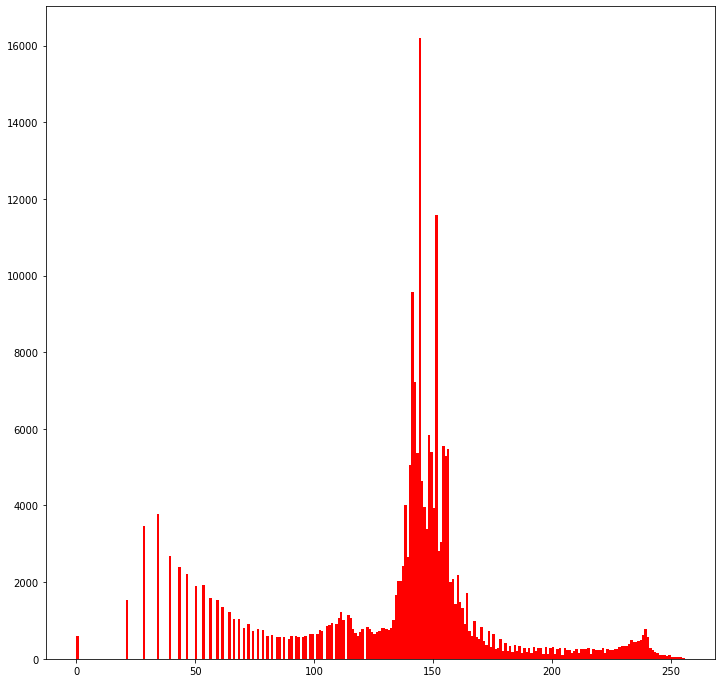

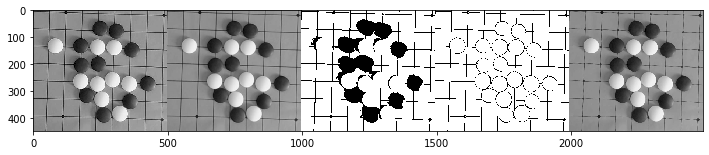

In [13]:
#global threshold(역치값) 쓴다는것이 한계다. 즉, 분류 기준이 하나다.
#해결법, 역치값을 여러개로 둔다.
#쉽게 생각하면, 따로따로 보는것이다.

image = cv2.imread(ip + "stone.png", 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0) #이값을 크게할수록 가장자리가 블러링된다.

binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY, 21, 21)

plt.figure(figsize = (12, 12))
imshow("", binary)

_,binaryO = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize = (12, 12))
#imshow("", np.hstack([image, img_blur, binaryO, binary]))
#1차원으로 변환, 몇개의 비(막대기 수, 전체의 범위)
plt.hist(image.ravel(), 256,[0, 256], color = 'r')
plt.show()

cv2.imwrite(ip + "output.png", binary)

median = cv2.medianBlur(image, 5)

plt.figure(figsize = (12, 12))
imshow("", np.hstack([image, img_blur, binaryO, binary, median]))


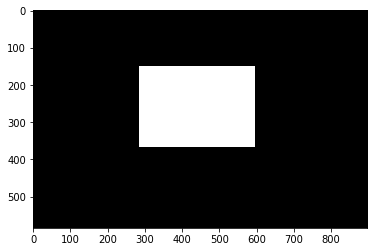

[array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)]


In [14]:
#도형인식
#노이즈가 없기 때문에, 가우시안 필요 없다.
#점의 위치를 보고, 도형의 모양을 인식한다.
#원도 사실 무수히 짧은 직선 무한개로 이루어진 다각형으로 본다.

img = cv2.imread(ip + 'shape4.png', 0)

thr, mask = cv2.threshold(img, 100, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("", mask)

#꼭지점을 찾아야한다. 이진영상에서 찾는 방법은, Boundary, 즉, 경계선을 찾는것이다.
#외곽선을 찾아야한다. (칸투어)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #EXTERNAL 외곽부분만 찾는다. 두개를 찾을때는 tree

#외곽선을 나타낼 수 있는 주요 지점만 출력
print(contours)

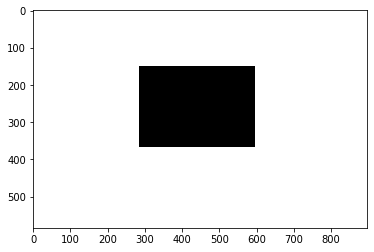

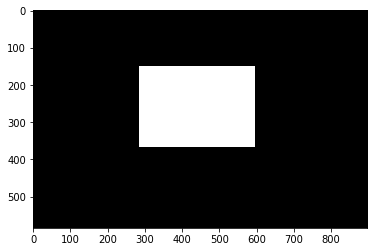

In [15]:
img = cv2.imread(ip + 'shape4.png', 0)

thr, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255-mask
imshow("", mask)

#꼭지점을 찾아야한다. 이진영상에서 찾는 방법은, Boundary, 즉, 경계선을 찾는것이다.
#외곽선을 찾아야한다. (칸투어)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #EXTERNAL 외곽부분만 찾는다. 두개를 찾을때는 tree

#외곽선을 나타낼 수 있는 주요 지점만 출력
#print(contours)

#image = cv2.imread('shape4.png')
cv2.drawContours(image, contours, -1, (255, 0, 0), 2)

imshow("", img)

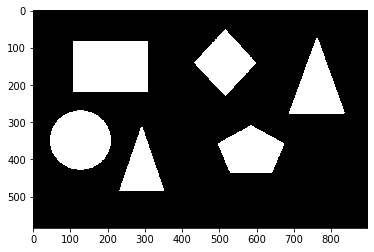

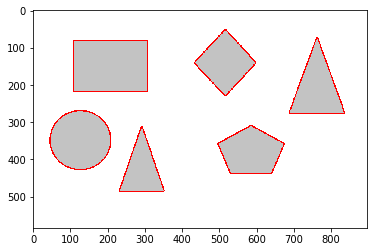

In [16]:
img = cv2.imread(ip + 'shape3.png', 0)
thr, mask = cv2.threshold(img, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)

mask = 255 - mask

imshow("", mask)
contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread(ip + 'shape3.png')

#각 도형의 모형 검출 0 ~ 5, (경계선 색깔), 굵기
cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
imshow("", image) 

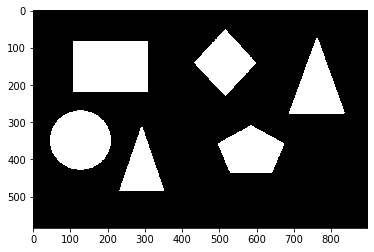

shape = 6
shape = 240
shape = 300
shape = 226
shape = 4
shape = 298
shape = 56


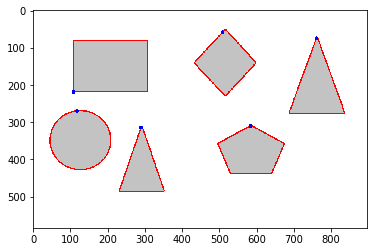

In [17]:
img = cv2.imread(ip + 'shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

imshow("", mask)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    print(  f"shape = {len(con)}"  )
    x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    y = con[1][0][1] #칸투어 [a][][] a번째, y좌표
    cv2.drawContours(img, [con], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
imshow("", img)

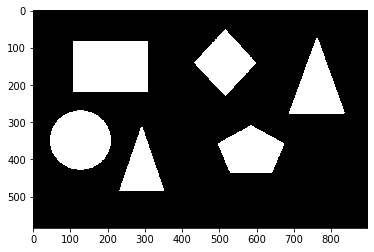

shape = 6
shape = 240 length = 513.7056245803833 approx = 3 
shape = 300 length = 515.9310202598572 approx = 5 
shape = 226 length = 531.8721435070038 approx = 8 
shape = 4 length = 672.0 approx = 4 
shape = 298 length = 616.7178171873093 approx = 3 
shape = 56 length = 493.0336227416992 approx = 4 


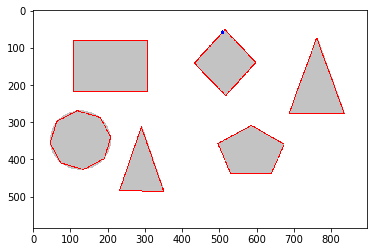

In [18]:
img = cv2.imread(ip + 'shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

imshow("", mask)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    
    peri = cv2.arcLength(con, True) #칸투어의 길이를 구하는 함수, True를 주는 이유는 도중에 끊기더라도, 폐곡선임을 가정하려고 한다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True) #길이가 2%정도 변화가 생기면 꼭지점으로 인식, True는 폐곡선으로 만들어준다. 
    
    print(  f"shape = {len(con)} length = {peri} approx = {len(approx)} " ) #approximation은 n각형을 의미 대략적인 각 도형들의 값을 알 수 있다.
    #x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    #y = con[1][0][1] #칸투어 [a][][] a번째, y좌표
    p = tuple(con[1][0])
    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
imshow("", img)

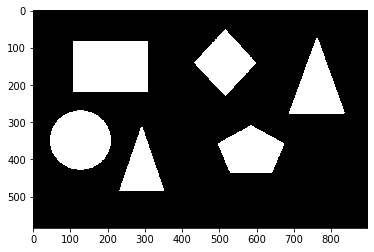

shape = 6
shape = 240 length = 513.7056245803833 approx = 3 
shape = 300 length = 515.9310202598572 approx = 5 
shape = 226 length = 531.8721435070038 approx = 8 
shape = 4 length = 672.0 approx = 4 
shape = 298 length = 616.7178171873093 approx = 3 
shape = 56 length = 493.0336227416992 approx = 4 


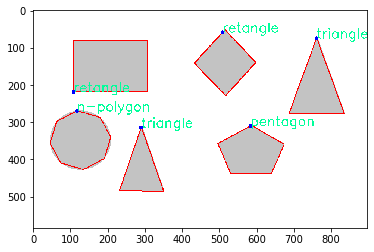

In [19]:
img = cv2.imread(ip + 'shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

imshow("", mask)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    
    peri = cv2.arcLength(con, True) #칸투어의 길이를 구하는 함수, True를 주는 이유는 도중에 끊기더라도, 폐곡선임을 가정하려고 한다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True) #길이가 2%정도 변화가 생기면 꼭지점으로 인식, True는 폐곡선으로 만들어준다. 
    
    print(  f"shape = {len(con)} length = {peri} approx = {len(approx)} " ) #approximation은 n각형을 의미 대략적인 각 도형들의 값을 알 수 있다.
    x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    y = con[1][0][1] #칸투어 [a][][] a번째, y좌표
    p = tuple(con[1][0])
    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
    
    if len(approx) == 3:
        cv2.putText(img, "triangle", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (155, 255, 0), 2)
    elif len(approx) == 4:
        cv2.putText(img, "retangle", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (155, 255, 0), 2)
    elif len(approx) == 5:
        cv2.putText(img, "pentagon", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (155, 255, 0), 2)
    else:
        cv2.putText(img, "n-polygon", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (155, 255, 0), 2)

imshow("", img)

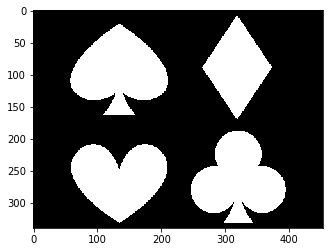

shape = 4
shape = 213 length = 492.1980459690094 approx = 10 
넓이 :  12215.5
shape = 264 length = 617.3279899358749 approx = 11 
넓이 :  13140.0
shape = 229 length = 568.6833263635635 approx = 10 
넓이 :  13255.5
shape = 215 length = 413.47012400627136 approx = 4 
넓이 :  8754.0


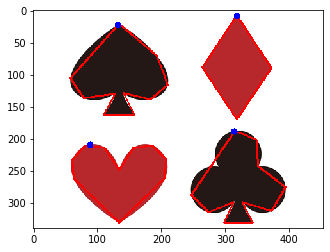

In [20]:
img = cv2.imread(ip + 'trumph.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

imshow("", mask)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    
    peri = cv2.arcLength(con, True) #칸투어의 길이를 구하는 함수, True를 주는 이유는 도중에 끊기더라도, 폐곡선임을 가정하려고 한다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True) #길이가 0.1%정도 변화가 생기면 꼭지점으로 인식, True는 폐곡선으로 만들어준다. 
    
    print(  f"shape = {len(con)} length = {peri} approx = {len(approx)} " ) #approximation은 n각형을 의미 대략적인 각 도형들의 값을 알 수 있다.
    print("넓이 : ", cv2.contourArea(con)) #노이즈 제거에도 사용할 수 있다.
    x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    y = con[1][0][1] #칸투어 [a][][] a번째, y좌표

    p = tuple(con[1][0])

    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
  
imshow("", img)

#면적을 구해주는 함수도 있고, 전체 길이를 이용해서 크기를 구하는 법도 있다.
#그러나, 길이와 면적이 항상 비례선상에 위치해 있지는 않다.
#길이, 넓이, approx값을 통해서 원하는것을 추출하거나, 제외시킬 수 있다.

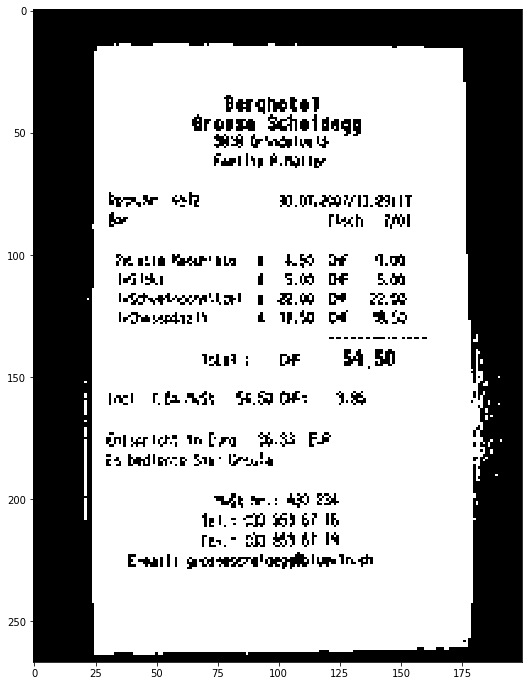

shape = 1
shape = 102 length = 812.0243852138519 approx = 4 
넓이 :  37963.0


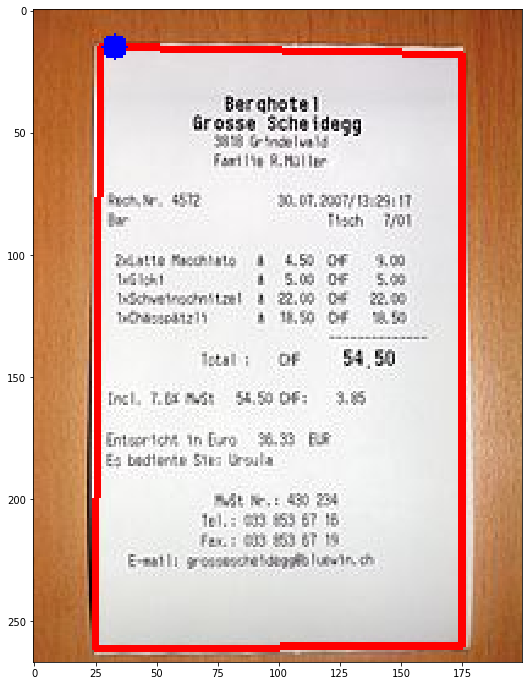

In [51]:
#영수증 인식
img = cv2.imread(ip + 'reciept.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#mask = 255 - mask

plt.figure(figsize = (12, 12))
imshow("", mask)

mask = cv2.medianBlur(mask, 5)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    
    peri = cv2.arcLength(con, True) #칸투어의 길이를 구하는 함수, True를 주는 이유는 도중에 끊기더라도, 폐곡선임을 가정하려고 한다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True) #길이가 0.1%정도 변화가 생기면 꼭지점으로 인식, True는 폐곡선으로 만들어준다. 
    
    print(  f"shape = {len(con)} length = {peri} approx = {len(approx)} " ) #approximation은 n각형을 의미 대략적인 각 도형들의 값을 알 수 있다.
    print("넓이 : ", cv2.contourArea(con)) #노이즈 제거에도 사용할 수 있다.
    x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    y = con[1][0][1] #칸투어 [a][][] a번째, y좌표

    p = tuple(con[1][0])

    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)

plt.figure(figsize = (12, 12))
imshow("", img)

#면적을 구해주는 함수도 있고, 전체 길이를 이용해서 크기를 구하는 법도 있다.
#그러나, 길이와 면적이 항상 비례선상에 위치해 있지는 않다.
#길이, 넓이, approx값을 통해서 원하는것을 추출하거나, 제외시킬 수 있다.
#영수증은 쉽게 되지 않는다.

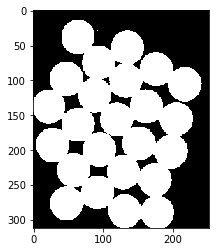

shape = 2
shape = 2 length = 2.0 approx = 2 
넓이 :  0.0
shape = 728 length = 1630.0600831508636 approx = 11 
넓이 :  47165.5


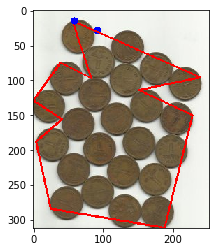

In [22]:
img = cv2.imread(ip + 'water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
thr, mask = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

imshow("", mask)

contours, _ = cv2.findContours(mask, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#칸투어 개수
print(  f"shape = {len(contours)}"  )

#c번째, 칸투어 정보
for con in contours :
    
    peri = cv2.arcLength(con, True) #칸투어의 길이를 구하는 함수, True를 주는 이유는 도중에 끊기더라도, 폐곡선임을 가정하려고 한다.
    approx = cv2.approxPolyDP(con, 0.02*peri, True) #길이가 0.1%정도 변화가 생기면 꼭지점으로 인식, True는 폐곡선으로 만들어준다. 
    
    print(  f"shape = {len(con)} length = {peri} approx = {len(approx)} " ) #approximation은 n각형을 의미 대략적인 각 도형들의 값을 알 수 있다.
    print("넓이 : ", cv2.contourArea(con)) #노이즈 제거에도 사용할 수 있다.
    x = con[1][0][0] #칸투어 [a][][] a번째, x좌표
    y = con[1][0][1] #칸투어 [a][][] a번째, y좌표

    p = tuple(con[1][0])

    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
  
imshow("", img)

#동전이 붙어있어, 칸투어가 하나만 나오는 문제가 발생한다.

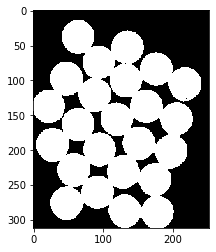

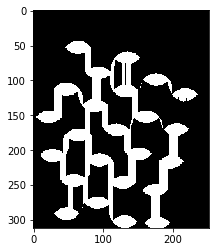

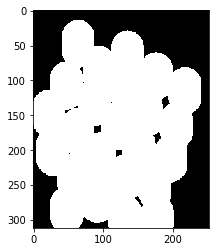

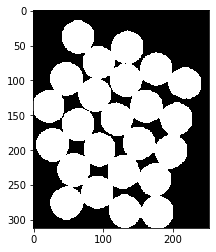

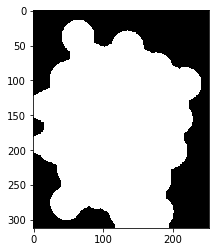

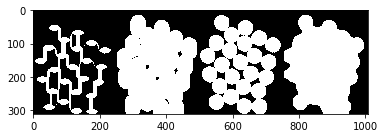

In [42]:
#침식연산자를 이용한다.
#팽창과 침식 2가지가 있다. 늘리거나, 줄이는것밖에 없다. 줄이는것은 약한 연결고리를 끊고, 팽창은 비어있는 부분이 뭉쳐진다.
img = cv2.imread(ip + 'water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

binary = 255 -  binary

imshow("", binary)

#팽창
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3, 3), iterations = 30)
imshow("", eroded)

#침식
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (5, 5), iterations = 20)
imshow("", dilated)

#용도에 따라 침식을 쓰느냐, 팽창을 쓰느냐는 다르다.

#침식 후 팽창 메꾸고 나서 줄이기
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations = 5)
imshow("", opened)


#팽창 후 침식 구멍메꾸기
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations = 5)
imshow("", closed)

#둘다 원래 영상 크기는 어느정도 유지 된다. 다만, 용도가 다르다.

atarasi = np.hstack([eroded, dilated, opened, closed])
plt.title(["eroded", "dilated", "opened", "closed"])
imshow("", atarasi)
plt.show()

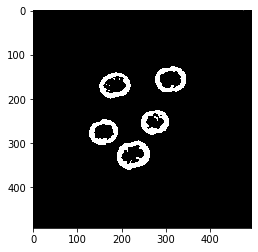

In [41]:
#import cv2. numpy as np
#의미적으로, import cv2, import numpy as np와 같다.
#처음에는 패키지 로딩이 필요해서 좀 걸리나, 한번 로딩한 후부터는, 과정이 생략되어 속도가 개선된다.

import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from PIL import ImageFont, ImageDraw, Image

#침식연산자를 이용한다.
#팽창과 침식 2가지가 있다. 늘리거나, 줄이는것밖에 없다. 줄이는것은 약한 연결고리를 끊고, 팽창은 비어있는 부분이 뭉쳐진다.

frame = cv2.imread(ip + "coin.png")

roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (7, 7), 0) #(7, 7)가우시안 적용할 영역
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 45, 6)

#배경이 밝고, 어둡기 때문에, 배경이 흰색이 되고, 전경이 검은색이 된다. 그러기 위해서 255에서 빼주던가, 아니면, 위와 같이 INV를 붙여준다.

imshow("", thresh)


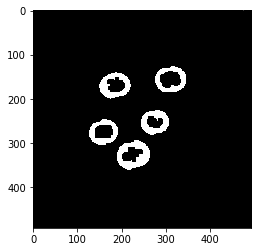

In [34]:
kernel = np.ones((3, 3), np.uint8) #전체 픽셀을 다 뭉친다.
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 4)
imshow("", closing)

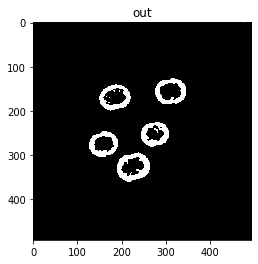

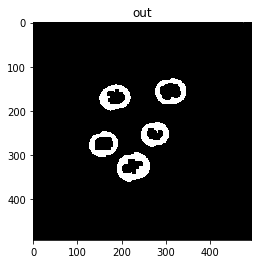

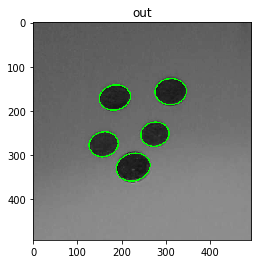

In [35]:
cont_img = closing.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    
    #넓이가 2000과 4000 사이이고, len(approx)가 최소 5이상인것만 검출된다.
    
    ellipse = cv2.fitEllipse(cnt) #주어진 점을 가지고 타원으로 매핑시키는 함수
    cv2.ellipse(roi, ellipse, (0, 255, 0), 2) #타원, 타원 색, 타원의 굵기
    
imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)